![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [11]:
# Carga de datos de archivo .csv
#data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
#data = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/tree/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data = pd.read_csv('https://github.com/davidzarruk/MIAD_ML_NLP_2023/raw/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


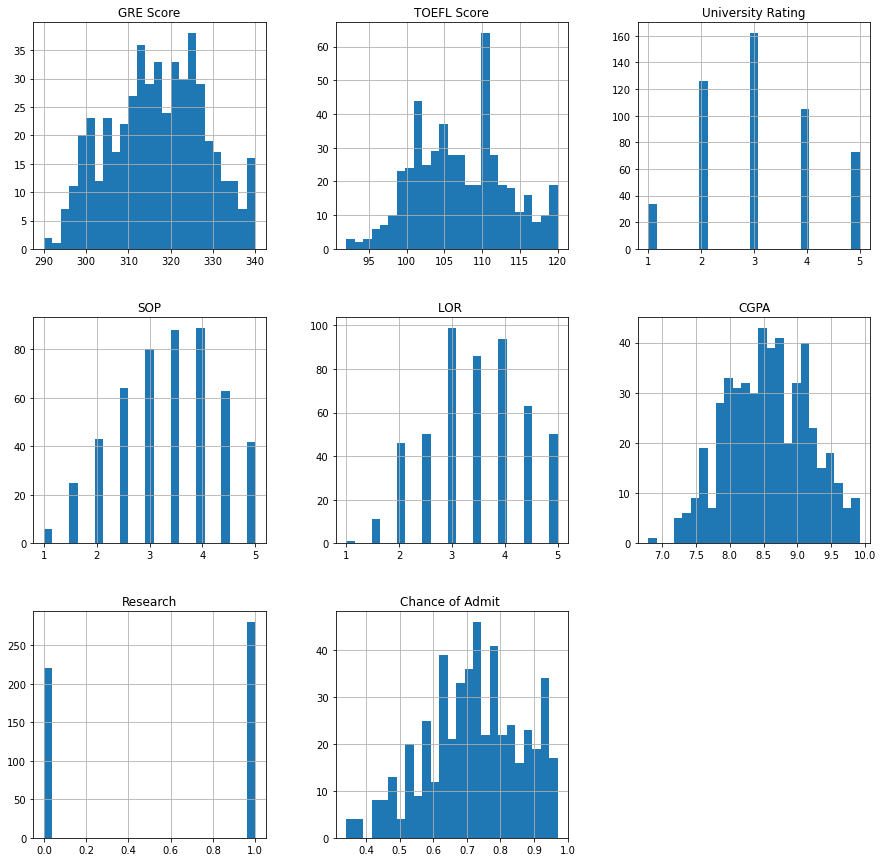

In [12]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [13]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [14]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [15]:
#Primero escalamos las variables predictoras de train y test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xTrain = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
ytrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

In [16]:
# Celda 1
#backend.clear_session()
NN1 = Sequential()
NN1.add(Dense(1, input_shape=(xTrain.shape[1],),activation='relu'))
NN1.compile(optimizer='sgd', loss='mean_squared_error')
print(NN1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


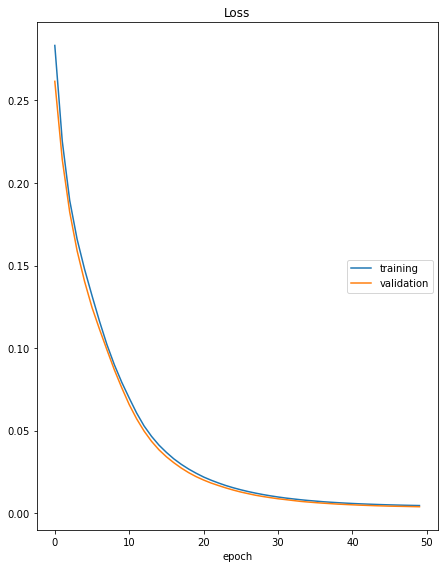

Loss
	training         	 (min:    0.005, max:    0.283, cur:    0.005)
	validation       	 (min:    0.004, max:    0.262, cur:    0.004)
11/11 [==============================] - 0s 17ms/step - loss: 0.0046 - val_loss: 0.0039


In [25]:
from livelossplot import PlotLossesKeras

NN1.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [26]:
ypredTrNN1 = NN1.predict(xTrain)
ypredNN1 = NN1.predict(xTest)

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

mseNN1 = mse(yTest,ypredNN1)
mseTrNN1 = mse(yTrain,ypredTrNN1)

maeNN1 = mae(yTest,ypredNN1)
maeTrNN1 = mae(yTrain,ypredTrNN1)

print(f'\nEl MSE de la red neuronal de una capa es: {mseNN1: 2f}')
print(f'El MSE de la red neuronal de una capa en los datos de train es: {mseTrNN1: 2f}')

print(f'\nEl MAE de la red neuronal de una capa es: {maeNN1: 2f}')
print(f'El MAE de la red neuronal de una capa en los datos de train es: {maeTrNN1: 2f}')

5/5 [==============================] - 0s 1ms/step

El MSE de la red neuronal de una capa es:  0.003864
El MSE de la red neuronal de una capa en los datos de train es:  0.004524

El MAE de la red neuronal de una capa es:  0.045760
El MAE de la red neuronal de una capa en los datos de train es:  0.049523


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [32]:
# Celda 2
NN2 = Sequential()
NN2.add(Dense(16, input_shape=(xTrain.shape[1],),activation='relu'))
NN2.add(Dense(1))
NN2.compile(optimizer='sgd', loss='mean_squared_error')
print(NN2.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                128       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


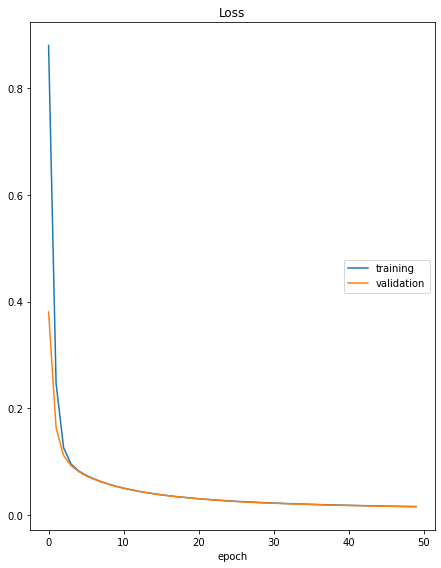

Loss
	training         	 (min:    0.016, max:    0.881, cur:    0.016)
	validation       	 (min:    0.015, max:    0.381, cur:    0.015)
11/11 [==============================] - 0s 16ms/step - loss: 0.0157 - val_loss: 0.0154


In [33]:
NN2.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [34]:
ypredTrNN2 = NN2.predict(xTrain)
ypredNN2 = NN2.predict(xTest)

mseNN2 = mse(yTest,ypredNN2)
mseTrNN2 = mse(yTrain,ypredTrNN2)

maeNN2 = mae(yTest,ypredNN2)
maeTrNN2 = mae(yTrain,ypredTrNN2)

print(f'\nEl MSE de la red neuronal de dos capas es: {mseNN2: 2f}')
print(f'El MSE de la red neuronal de dos capas en los datos de train es: {mseTrNN2: 2f}')

print(f'\nEl MAE de la red neuronal de dos capas es: {maeNN2: 2f}')
print(f'El MAE de la red neuronal de dos capas en los datos de train es: {maeTrNN2: 2f}')

5/5 [==============================] - 0s 1ms/step

El MSE de la red neuronal de dos capas es:  0.015394
El MSE de la red neuronal de dos capas en los datos de train es:  0.015463

El MAE de la red neuronal de dos capas es:  0.092013
El MAE de la red neuronal de dos capas en los datos de train es:  0.096199


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [73]:
# Celda 3
from keras.callbacks import EarlyStopping, ModelCheckpoint
NN3 = Sequential()
NN3.add(Dense(20, input_shape=(xTrain.shape[1],),activation='relu'))
NN3.add(Dropout(0.5))
NN3.add(Dense(20, input_shape=(xTrain.shape[1],),activation='relu'))
NN3.add(Dropout(0.5))
NN3.add(Dense(1))
NN3.compile(optimizer='sgd', loss='mean_squared_error')
print(NN3.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 20)                160       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 21        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None


In [74]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

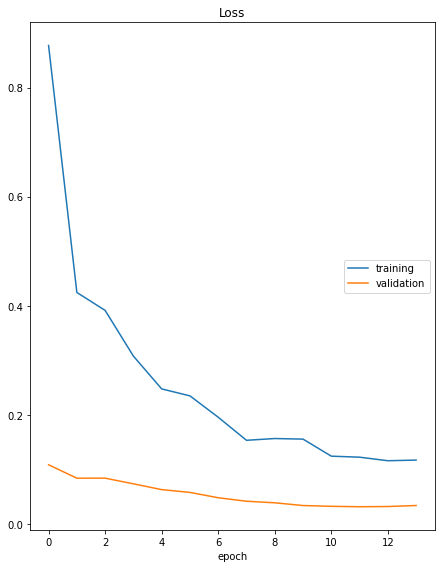

Loss
	training         	 (min:    0.116, max:    0.877, cur:    0.117)
	validation       	 (min:    0.031, max:    0.108, cur:    0.034)
11/11 [==============================] - 1s 64ms/step - loss: 0.1169 - val_loss: 0.0336
Epoch 14: early stopping


In [76]:
NN3.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras(),best_model, early_stop])

In [77]:
ypredTrNN3 = NN3.predict(xTrain)
ypredNN3 = NN3.predict(xTest)

mseNN3 = mse(yTest,ypredNN3)
mseTrNN3 = mse(yTrain,ypredTrNN3)

maeNN3 = mae(yTest,ypredNN3)
maeTrNN3 = mae(yTrain,ypredTrNN3)

print(f'\nEl MSE de la red neuronal de dos capas es: {mseNN3: 2f}')
print(f'El MSE de la red neuronal de dos capas en los datos de train es: {mseTrNN3: 2f}')

print(f'\nEl MAE de la red neuronal de dos capas es: {maeNN3: 2f}')
print(f'El MAE de la red neuronal de dos capas en los datos de train es: {maeTrNN3: 2f}')

5/5 [==============================] - 0s 4ms/step

El MSE de la red neuronal de dos capas es:  0.033609
El MSE de la red neuronal de dos capas en los datos de train es:  0.034209

El MAE de la red neuronal de dos capas es:  0.160684
El MAE de la red neuronal de dos capas en los datos de train es:  0.157397


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [78]:
# Celda 4
